In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
sns.set_style('darkgrid')

In [33]:
from sklearn.datasets import load_iris


iris_dataset = load_iris()
dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

dataset.columns = [name.split('(')[0].strip() for name in dataset.columns]
dataset

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
dataset['Species'] = iris_dataset.target
dataset

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


0 : setosa
1 : virginica
2 : versicolor

In [35]:
dataset['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

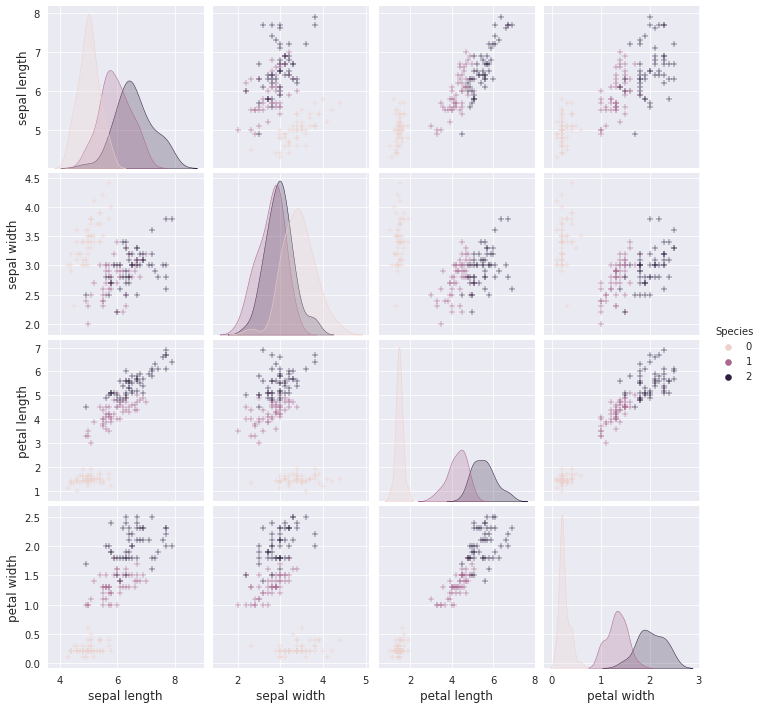

In [36]:
g = sns.pairplot(dataset, hue='Species', markers='+')
plt.show()

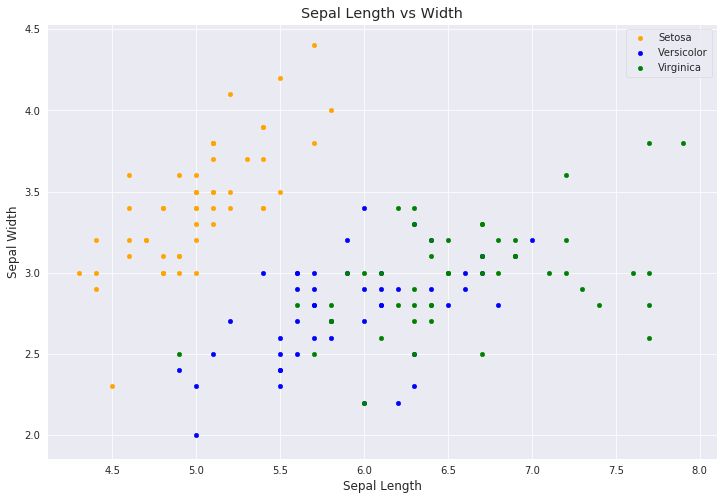

In [37]:
fig = dataset[dataset.Species==0].plot(kind='scatter', x='sepal length', y='sepal width', color='orange', label='Setosa')
dataset[dataset.Species==1].plot(kind='scatter', x='sepal length', y='sepal width', color='blue', label='Versicolor', ax=fig)
dataset[dataset.Species==2].plot(kind='scatter', x='sepal length', y='sepal width', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

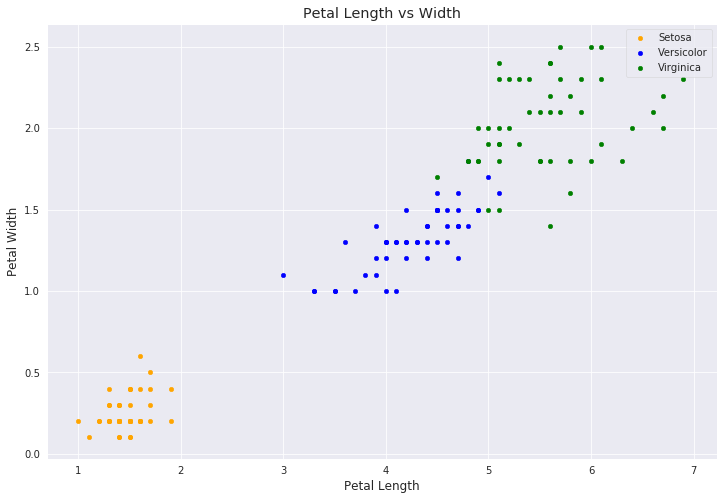

In [38]:
fig = dataset[dataset.Species==0].plot(kind='scatter', x='petal length', y='petal width', color='orange', label='Setosa')
dataset[dataset.Species==1].plot(kind='scatter', x='petal length', y='petal width', color='blue', label='Versicolor', ax=fig)
dataset[dataset.Species==2].plot(kind='scatter', x='petal length', y='petal width', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

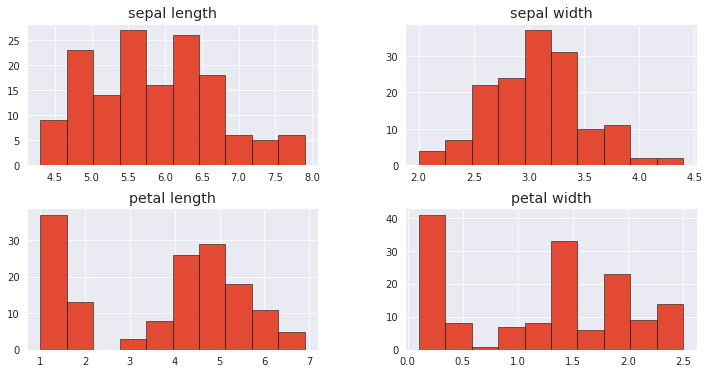

In [40]:
feature_data = dataset.drop('Species', axis=1)
feature_data.hist(edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

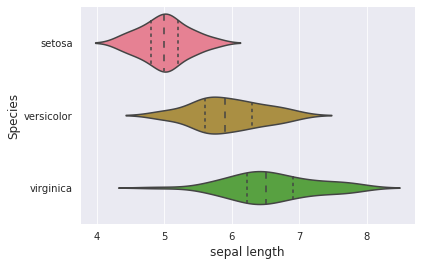

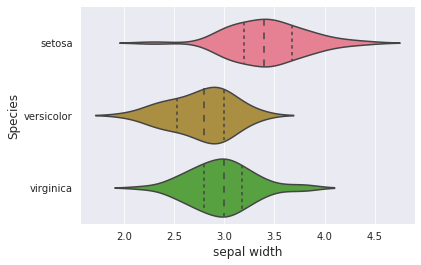

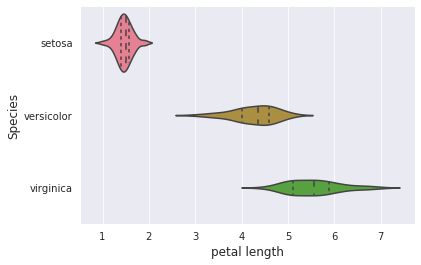

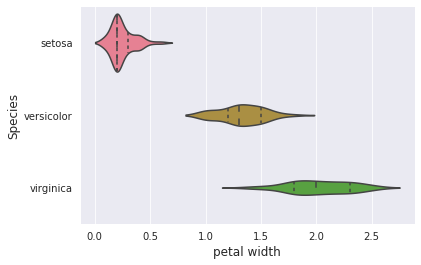

In [50]:
named_dataset = dataset.replace({'Species': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}})


g = sns.violinplot(x='sepal length', y='Species', data=named_dataset, inner='quartile')
plt.show()

g = sns.violinplot(x='sepal width', y='Species', data=named_dataset, inner='quartile')
plt.show()

g = sns.violinplot(x='petal length', y='Species', data=named_dataset, inner='quartile')
plt.show()

g = sns.violinplot(x='petal width', y='Species', data=named_dataset, inner='quartile')
plt.show()

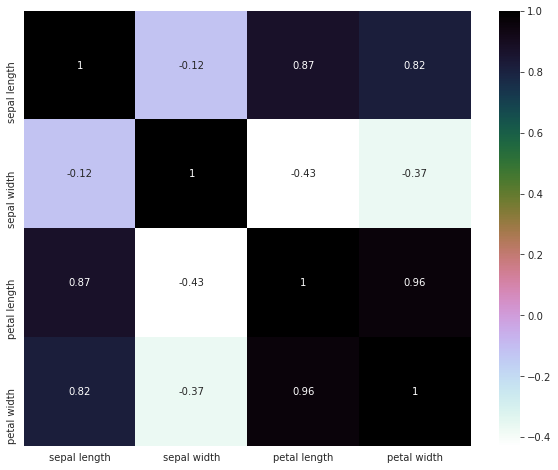

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(named_dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [60]:
X = dataset.drop('Species', axis=1)
y = dataset['Species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier



lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc_lr = metrics.accuracy_score(y_pred, y_test)


print('The accuracy of the Logistic Regression is', acc_lr)

The accuracy of the Logistic Regression is 1.0


### Decision Tree

In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

acc_dt = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Decision Tree is', acc_dt)

The accuracy of the Decision Tree is 0.9777777777777777


### SVM

In [67]:
sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

acc_sv = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the SVM is:', acc_sv)

The accuracy of the SVM is: 1.0


### KNN

In [69]:
knc = KNeighborsClassifier(n_neighbors=3)

knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

acc_knc = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the KNN is', acc_knc)

The accuracy of the KNN is 0.9777777777777777


([<matplotlib.axis.XTick at 0x7fc284a95be0>,
 <a list of 10 Text xticklabel objects>)

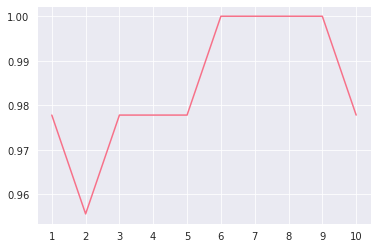

In [70]:
a_index = list(range(1, 11))

a = pd.Series()
x = list(range(1, 11))

for i in list(range(1, 11)):
    kcs = KNeighborsClassifier(n_neighbors=i)
    kcs.fit(X_train, y_train)
    y_pred = kcs.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(y_pred, y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines',
              'K-Nearest Neighbours'],
    'Score': [acc_lr, acc_dt, acc_sv, acc_knc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,1.000000
2,Support Vector Machines,1.000000
1,Decision Tree,0.977778
3,K-Nearest Neighbours,0.977778
